### Agrupamento ou  Clusterização é uma técnica não supervisionada para dividir um grupo em conjuntos, portanto:
* Não existem classes;
* Objetivo é criar grupos a partir de atributos (características) das instâncias.

### Tipos de grupos:
* Agrupamento completo: cada elemento é adicionado em um único grupo.

<img src="clusterizacao_1.png" />

### Tipos de grupos: 
* Agrupamento parcial: cada instancia pode pertencer a mais de um grupo.


<img src="clusterizacao_2.png"/>

### Tipos de grupos:
* Modelo Difuso: cada elemento pertence a um grupo segundo uma probabilidade.

<img src="modelo_difuso.png"/>

### Tipos de grupos:
* Modelo Hierárquico: permite que o grupo tenha subgrupos

<img src="modelo_hirarquico.png"/>

### Tipos de grupos:
* Agrupa todos os elementos;
* Pode deixar elementos sem agrupar (ruído).

<img src="agrupamento_final.png"/>

### K-means e K-medoid
* Simples; Baseado em protótipo; Encontra um número de grupos definido pelo usuário; Agrupa todos os objetos; Definir os centróides é uma etapa fundamental; Distância Euclidiana;
* K-means: Protótipo é um centróide: média de grupo de pontos. Quase nunca é um ponto real de dados;
* K-medoid: Protótipo baseado em medóide: ponto mais representativo. É um ponto real de dados.
* Tem dificuldade para detectar grupos naturais, não esféricas, de tamanho ou densidades muito diferentes;
* Pode ser melhorado escolhendo os centros.

In [ ]:
#Vamos ver a versão do threadpoolctl.
#Se a versão for inferior a 3.1.0, devemos fazer upgrade. 
import threadpoolctl
print(threadpoolctl.__version__)

In [ ]:
!pip install threadpoolctl --upgrade

In [ ]:
#Se continuar a dar erro fazemos o  downgrade do numpy
!pip install numpy==1.21.4 

In [1]:
# Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Carregamento da base de dados 
iris = datasets.load_iris()

In [3]:
# visualização de quantos registros existem por classe
unicos, quantidade = np.unique(iris.target, return_counts = True)
print(unicos)
print(quantidade)

[0 1 2]
[50 50 50]


In [4]:
quantidade

array([50, 50, 50], dtype=int64)

In [5]:
# Agrupamento com k-means, utilizando 3 clusters (de acordo com a base de dados)
cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data)

KMeans(n_clusters=3)

In [7]:
# Visualização dos três centroides
centroides = cluster.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [8]:
# Visualização dos grupos que cada registro foi associado
previsoes = cluster.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
# Contagem dos registros por classe
unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
unicos2

array([0, 1, 2])

In [10]:
quantidade2

array([62, 50, 38], dtype=int64)

In [11]:
# Geração da matriz de contingência para comparar os grupos com a base de dados
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

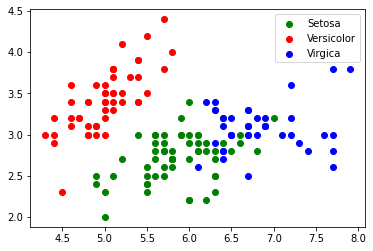

In [12]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2)
# Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1], 
            c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1], 
            c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1], 
            c = 'blue', label = 'Virgica')
plt.legend()

### C-means
* O agrupamento fuzzy C-Means é uma abordagem de agrupamento suave, onde cada ponto de dados é atribuído a uma probabilidade ou pontuação de probabilidade de pertencer a esse agrupamento;
* Os princípios da lógica difusa podem ser usados para agrupar dados multidimensionais, atribuindo a cada ponto uma associação em cada centro de agrupamento de 0 a 100 por cento.

In [13]:
#!pip install -U scikit-fuzzy

In [14]:
# Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import skfuzzy

In [15]:
# Carregamento da base de dados iris, que já está disponível no sklearn
iris = datasets.load_iris()

In [16]:
# Aplicação do algoritmo definindo três cluster (c = 3) e passando a matriz transposta (iris.data.T). 
#Os outros parâmetros são obrigatórios e são os default indicados na documentação
r = skfuzzy.cmeans(data = iris.data.T, c = 3, m = 2, error = 0.005,
                   maxiter = 1000, init = None)

In [17]:
# Obtendo as porcentagens de um registros pertencer a um cluster, que está na posição 1 da matriz retornada
previsoes_porcentagem = r[1]

In [18]:
# Visualização da probabilidade de um registro pertencer a cada um dos cluster (o somatório é 1.0 que indica 100%)
for x in range(150):
  print( previsoes_porcentagem[0][x] ,previsoes_porcentagem[1][x] ,previsoes_porcentagem[2][x] )

0.0023044525670331936 0.0010719057273151638 0.9966236417056518
0.01666160551136333 0.007501973316213915 0.9758364211724226
0.013767400355732089 0.006417180366314717 0.9798154192779531
0.02248109459107904 0.010112814525239386 0.9674060908836816
0.003762145465241255 0.0017678835261698163 0.9944699710085889
0.044831493180189225 0.020628877633078215 0.9345396291867325
0.014011990835285303 0.006507253209996649 0.9794807559547181
0.0003117509040183693 0.00014127973487035328 0.9995469693611113
0.04774847285158494 0.021912406828791788 0.9303391203196232
0.011944589023107887 0.005344615581787846 0.9827107953951044
0.021767879091886728 0.010204848007939502 0.9680272729001738
0.005436254465293187 0.002432618949151453 0.9921311265855552
0.020196429131207692 0.00918170384928124 0.9706218670195111
0.05182159241850631 0.02524544310244374 0.92293296447905
0.07263720767295402 0.037643601207994135 0.8897191911190518
0.10438730092741356 0.05432383840734156 0.8412888606652449
0.03559453160034825 0.0175014

In [19]:
# Geração de matriz de contingência para comparação com as classes originais da base de dados
previsoes = previsoes_porcentagem.argmax(axis = 0)
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0,  0, 50],
       [47,  3,  0],
       [13, 37,  0]], dtype=int64)

In [20]:
from fcmeans import FCM
from matplotlib import pyplot as plt

In [21]:
fcm = FCM(n_clusters=2)
fcm.fit(iris.data)

In [22]:
X = iris.data

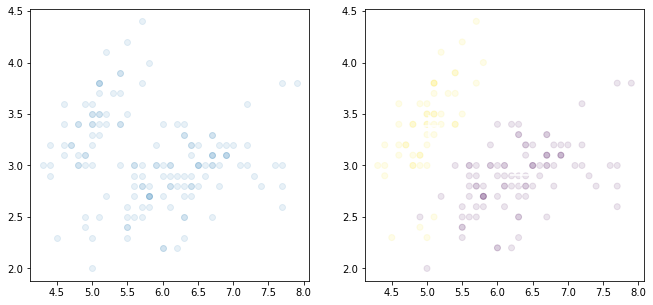

In [23]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

### K-medoids

In [24]:
#!pip install pyclustering

In [25]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [26]:
iris = datasets.load_iris()

In [27]:
# Configuração dos parâmetros do k-medoids, utilizando somente as duas primeiras colunas da base de dados por causa da visualização apenas
# 3, 12 e 20 são índices aleatórios de registros da base de dados (inicialização)
cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])
# Visualização dos pontos escolhidos (3, 12 e 20)
cluster.get_medoids()

[3, 12, 20]

In [28]:
# Aplicação do algoritmo para o agrupamento, obtenção da previsões (grupo de cada registro) e visualização dos medoides
cluster.process()
previsoes = cluster.get_clusters()
medoides = cluster.get_medoids()
#lista de 3 elementos, com os indices dos registros do cluster
previsoes

[[50,
  51,
  52,
  54,
  56,
  58,
  65,
  74,
  75,
  76,
  77,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148],
 [53,
  55,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  106]]

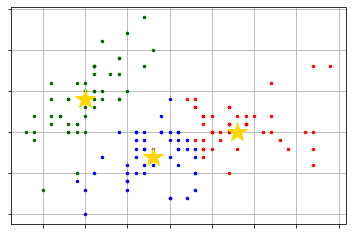

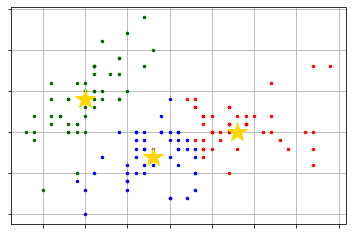

In [29]:
# Visualização do agrupamento
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:,0:2])
v.append_cluster(medoides, data = iris.data[:,0:2], marker = '*', markersize = 20)
v.show()

In [30]:
# Código para criar duas listas, uma com os grupos reais da base de dados e outra com os valores dos grupos
# Utilizado posteriormente para visualização da matriz de contingência
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
     for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])

In [ ]:
# Geração da matriz de contingência, comparando os grupos reais com os grupos previstos
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

### Referências
* Formação Cientista de Dados - Fernando Amaral e Jones Granatyr. Disponpivel em: https://www.udemy.com/course/cientista-de-dados/learn/lecture/21173996#search. Acesso em 26/10/2022.
* Fuzzy C-Means Clustering —Is it Better than K-Means Clustering?. Disponível em: https://towardsdatascience.com/fuzzy-c-means-clustering-is-it-better-than-k-means-clustering-448a0aba1ee7. Acesso em 26/10/2022.
* Fuzzy C-Means Clustering (FCM) Algorithm. Disponível em: https://medium.com/geekculture/fuzzy-c-means-clustering-fcm-algorithm-in-machine-learning-c2e51e586fff. Acesso em 26/10/2022.